In [1]:
import pandas as pd
import seaborn as sns

/Users/hiromi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("bayarea_zipcodes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PO_NAME   187 non-null    object 
 1   the_geom  187 non-null    object 
 2   ZIP       187 non-null    int64  
 3   STATE     187 non-null    object 
 4   Area__    187 non-null    float64
 5   Length__  187 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.9+ KB


In [4]:
df2 = pd.DataFrame(df[['PO_NAME', 'ZIP']])

In [5]:
df2.shape

(187, 2)

In [6]:
df2.head()

,PO_NAME,ZIP
0,NAPA,94558
1,FAIRFIELD,94533
2,DIXON,95620
3,SONOMA,95476
4,NAPA,94559


In [7]:
df3 = pd.read_csv("Zip_ZORI_AllHomesPlusMultifamily_SSA.csv")

In [8]:
df3.shape

(2726, 93)

In [29]:
dfSF = df3[df3.MsaName.str.contains('San Francisco, CA') | df3.MsaName.str.contains('San Jose, CA')]  

In [30]:
dfSF = pd.DataFrame(dfSF)

In [31]:
#add a new column which shows change from 2020-01
dfSF['change_before_pandemic'] = dfSF['2021-05']/dfSF['2019-05']*100-100

In [32]:
#add a new column which shows change from 2020-05
dfSF['change_yoy'] = dfSF['2021-05']/dfSF['2020-05']*100-100

In [34]:
dfSF.shape

(95, 95)

In [35]:
# dfSF.columns.get_loc('RegionName')
# dfSF.columns.get_loc('2019-05')
dfSF.columns.get_loc('change_yoy')

94

In [36]:
# .iloc = pick columns number （列番号を指定）
dfSF2 = pd.DataFrame(dfSF.iloc[: , [1, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]])

In [38]:
dfSF2.shape

(95, 28)

In [39]:
dfSF2[dfSF2['change_yoy'].isna()]

,RegionName,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,...,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,change_before_pandemic,change_yoy
503,94015,3110.0,3123.0,3135.0,3146.0,3157.0,3169.0,3174.0,3180.0,3186.0,...,3224.0,3228.0,3231.0,3235.0,3239.0,NaN,3249.0,3253.0,4.598071,NaN
2665,95130,3431.0,3436.0,3440.0,3441.0,3441.0,3442.0,3440.0,3438.0,3437.0,...,3319.0,3289.0,3258.0,3228.0,3196.0,3164.0,3132.0,NaN,NaN,NaN


In [41]:
dfSF3 = df2.merge(dfSF2, left_on='ZIP' , right_on='RegionName')

In [44]:
dfSF3.shape

(76, 30)

In [47]:
dfSF3 = dfSF3.set_index('ZIP')

KeyError: "None of ['ZIP'] are in the columns"

In [48]:
dfSF3.shape

(75, 28)

In [49]:
sns.set(font='DejaVu Sans')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='2021-05', ylabel='change_before_pandemic'>

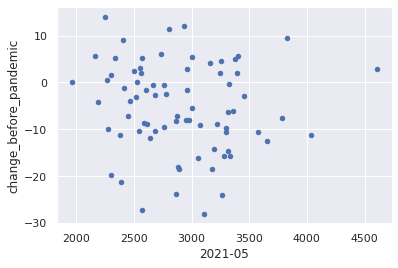

In [50]:
dfSF3[['2021-05', 'change_before_pandemic']].plot.scatter( x='2021-05', y='change_before_pandemic')

In [51]:
dfSF4 = dfSF3[['PO_NAME', '2021-05', 'change_before_pandemic']]
dfSF4.to_csv("sfzip_rent.csv")